# Exploration des Korpus & Visualisierungen

In [1]:
from collections import Counter
from lexicalrichness import LexicalRichness
from matplotlib import pyplot as plt
from matplotlib import ticker
import glob
import math
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [2]:
# großes DF einlesen 

df_bigger = pd.read_csv('Korpus/corpus_complete.csv', sep=',', encoding='utf-8')

In [3]:
df_bigger.head()

,doc,source,author,title,year,period,text_type,text,words
0,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0
1,Poesia.IV.11.Testo.txt,MIDIA,Giambattista Felice Zappi,Poesie,1700.0,1700-1750,poesia,IV. 11. Rime degli arcadi: Tirsi Leucasio (Gio...,6113.0
2,Poesia.IV.1.Testo.txt,MIDIA,Giuseppe Paolucci (Alessi Cillenio),Poesie,1700.0,1700-1750,poesia,IV. 1. Rime degli Arcadi: Alessi Cillenio (Giu...,10862.0
3,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0
4,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0


In [4]:
df_bigger.shape

(431959, 9)

### Anzahl der Texte pro Zeitraum

In [5]:
periods = list(df_bigger['period'].unique())
per_len ={i: len(df_bigger[df_bigger['period']==i]) for i in periods}
per_len

{'1700-1750': 6675,
 '1751-1800': 1855,
 '1801-1850': 5329,
 '1851-1900': 25394,
 '1901-1950': 34085,
 '1951-2000': 104732,
 '2001-2021': 253889}

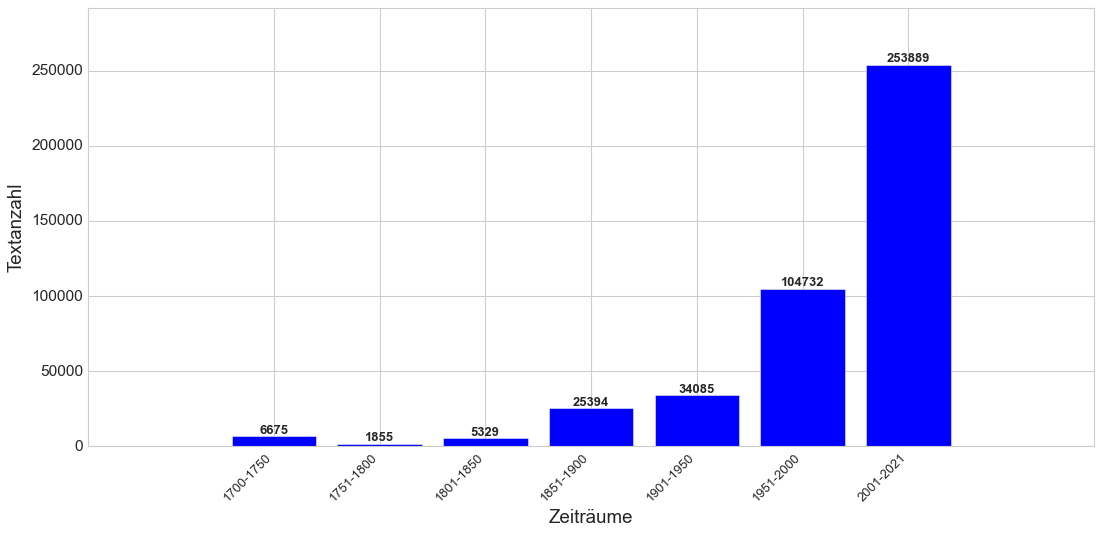

In [9]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods))
plt.bar(x_indexes, per_len.values(), label='Textanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = per_len.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Textanzahl')

#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, per_len.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusbig_textanzahl.png')
plt.show()

### Anzahl der Tokens pro Zeitraum

In [10]:
sum_words = {i: math.trunc(sum(df_bigger[df_bigger['period']==i].words)) for i in periods}
sum_words

{'1700-1750': 2208509,
 '1751-1800': 2567325,
 '1801-1850': 4829737,
 '1851-1900': 10045673,
 '1901-1950': 5163772,
 '1951-2000': 5422834,
 '2001-2021': 5964589}

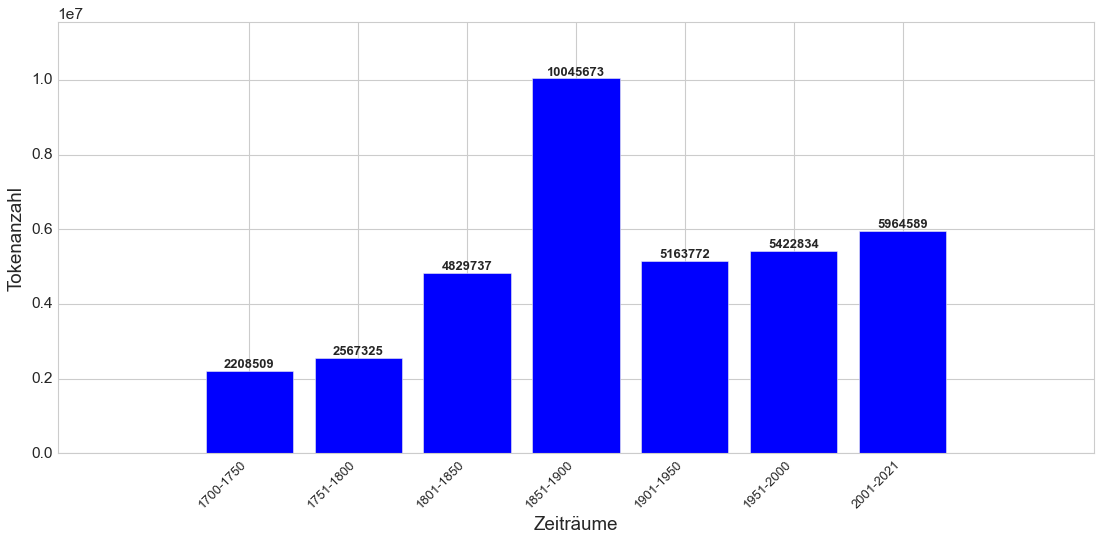

In [14]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(sum_words))
plt.bar(x_indexes, sum_words.values(), label='Tokenanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = sum_words.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/corpusbig_tokenanzahl.png')
plt.show()

### Durchschnittslänge der Texte pro Zeitraum

In [15]:
# gerundet auf 1 Nachkommastelle

mean_words = {i: round(df_bigger[df_bigger['period']==i].words.mean(), 1) for i in periods}
mean_words

{'1700-1750': 330.9,
 '1751-1800': 1384.0,
 '1801-1850': 906.3,
 '1851-1900': 395.6,
 '1901-1950': 151.5,
 '1951-2000': 51.8,
 '2001-2021': 23.5}

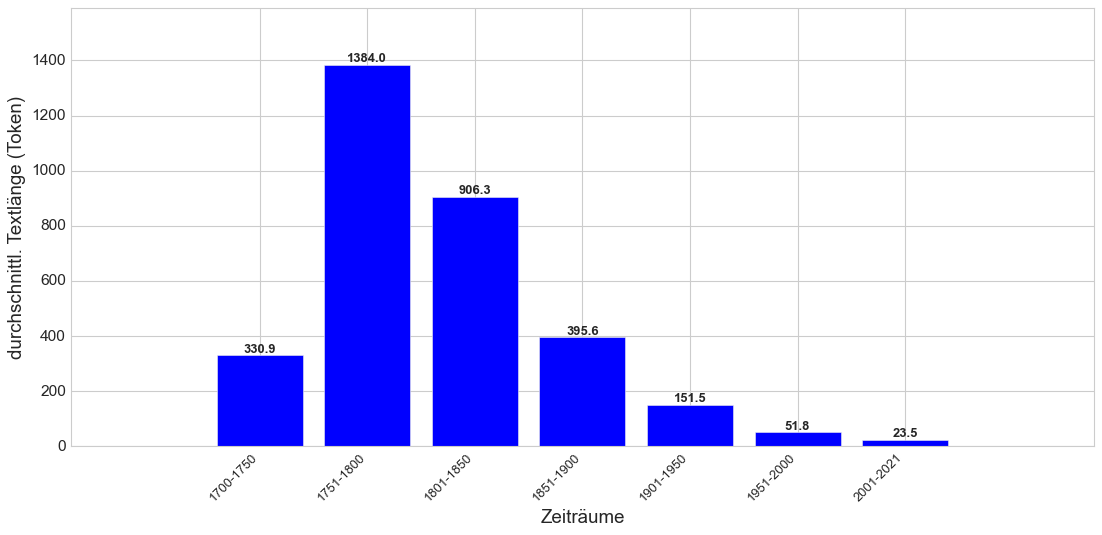

In [16]:
# Verteilung der durchschnittlichen Textlänge auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods))
plt.bar(x_indexes, mean_words.values(), label='Textlänge', width=0.8, color='b')
plt.xticks(ticks=x_indexes, labels=mean_words.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('durchschnittl. Textlänge (Token)')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, mean_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/corpusbig_durchschn_tokenanzahl.png')
plt.show()

### Verteilung der Texttypen auf die Zeiträume

In [17]:
period_frames = []

In [18]:
# Teilframes pro Zeitraum erstellen

df_periods = dict(tuple(df_bigger.groupby(by='period')))

for df, period in zip(df_periods, periods):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [19]:
periods_texttypes = {}

In [20]:
# Anzahl der Texte pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods):
    texttypes = df.groupby(by='text_type')
    types = texttypes.groups
    
    periods_texttypes[period] = {key : len(value) for key, value in types.items()}

In [21]:
periods_texttypes

{'1700-1750': {'espositivo': 15,
  'personale': 19,
  'poesia': 13,
  'prosa letteraria': 6603,
  'teatro': 25},
 '1751-1800': {'espositivo': 33,
  'personale': 16,
  'poesia': 21,
  'prosa letteraria': 1739,
  'teatro': 46},
 '1801-1850': {'espositivo': 91,
  'personale': 37,
  'poesia': 42,
  'prosa letteraria': 5145,
  'teatro': 14},
 '1851-1900': {'espositivo': 52,
  'personale': 19,
  'poesia': 24,
  'prosa letteraria': 25269,
  'stampa': 15,
  'teatro': 15},
 '1901-1950': {'espositivo': 57,
  'personale': 12,
  'poesia': 16,
  'prosa letteraria': 33923,
  'stampa': 63,
  'teatro': 14},
 '1951-2000': {'dialogo': 7,
  'espositivo': 25,
  'prosa letteraria': 732,
  'stampa': 103968},
 '2001-2021': {'dialogo': 4,
  'prosa letteraria': 6,
  'stampa': 213205,
  'web': 40674}}

In [22]:
periods_texttypes_token = {}

In [23]:
# Anzahl der Tokens pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods):
    words = {i: math.trunc(sum(df[df['text_type']==i].words)) for i in list(df['text_type'].unique())}
    periods_texttypes_token[period] = words

In [24]:
periods_texttypes_token

{'1700-1750': {'poesia': 512572,
  'personale': 236165,
  'espositivo': 877862,
  'prosa letteraria': 330533,
  'teatro': 251377},
 '1751-1800': {'personale': 392092,
  'espositivo': 1347425,
  'teatro': 474435,
  'poesia': 198675,
  'prosa letteraria': 154698},
 '1801-1850': {'espositivo': 2074628,
  'poesia': 426008,
  'personale': 1230289,
  'prosa letteraria': 974667,
  'teatro': 124145},
 '1851-1900': {'espositivo': 1974635,
  'personale': 778465,
  'prosa letteraria': 6899586,
  'poesia': 220913,
  'teatro': 135057,
  'stampa': 37017},
 '1901-1950': {'espositivo': 1092149,
  'poesia': 149436,
  'prosa letteraria': 3461658,
  'teatro': 106534,
  'personale': 324893,
  'stampa': 29102},
 '1951-2000': {'stampa': 4385796,
  'prosa letteraria': 902668,
  'espositivo': 119362,
  'dialogo': 15008},
 '2001-2021': {'prosa letteraria': 247200,
  'stampa': 4744091,
  'dialogo': 3783,
  'web': 969515}}

In [25]:
espositivo = []
dialogo = []
poesia = []
personale = []
prosa_lett = []
stampa = []
teatro = []
web = []

In [26]:
# Werte des Texttyps rausziehen und in Liste speichern 

for i in periods_texttypes_token:
    
    esp = periods_texttypes_token.get(i, {}).get('espositivo')
    espositivo.append(esp)
    
    di = periods_texttypes_token.get(i, {}).get('dialogo')
    dialogo.append(di)
    
    po = periods_texttypes_token.get(i, {}).get('poesia')
    poesia.append(po)
    
    per = periods_texttypes_token.get(i, {}).get('personale')
    personale.append(per)
    
    prolet = periods_texttypes_token.get(i, {}).get('prosa letteraria')
    prosa_lett.append(prolet)
    
    st = periods_texttypes_token.get(i, {}).get('stampa')
    stampa.append(st)
    
    tea = periods_texttypes_token.get(i, {}).get('teatro')
    teatro.append(tea)
    
    w = periods_texttypes_token.get(i, {}).get('web')
    web.append(w)

In [27]:
# None mit 0 ersetzen

espositivo = [0 if v is None else v for v in espositivo]
dialogo = [0 if v is None else v for v in dialogo]
poesia = [0 if v is None else v for v in poesia]
personale = [0 if v is None else v for v in personale]
prosa_lett = [0 if v is None else v for v in prosa_lett]
stampa = [0 if v is None else v for v in stampa]
teatro = [0 if v is None else v for v in teatro]
web = [0 if v is None else v for v in web]

In [28]:
print(espositivo)
print(dialogo)
print(personale)
print(poesia)
print(prosa_lett)
print(stampa)
print(teatro)
print(web)

[877862, 1347425, 2074628, 1974635, 1092149, 119362, 0]
[0, 0, 0, 0, 0, 15008, 3783]
[236165, 392092, 1230289, 778465, 324893, 0, 0]
[512572, 198675, 426008, 220913, 149436, 0, 0]
[330533, 154698, 974667, 6899586, 3461658, 902668, 247200]
[0, 0, 0, 37017, 29102, 4385796, 4744091]
[251377, 474435, 124145, 135057, 106534, 0, 0]
[0, 0, 0, 0, 0, 0, 969515]


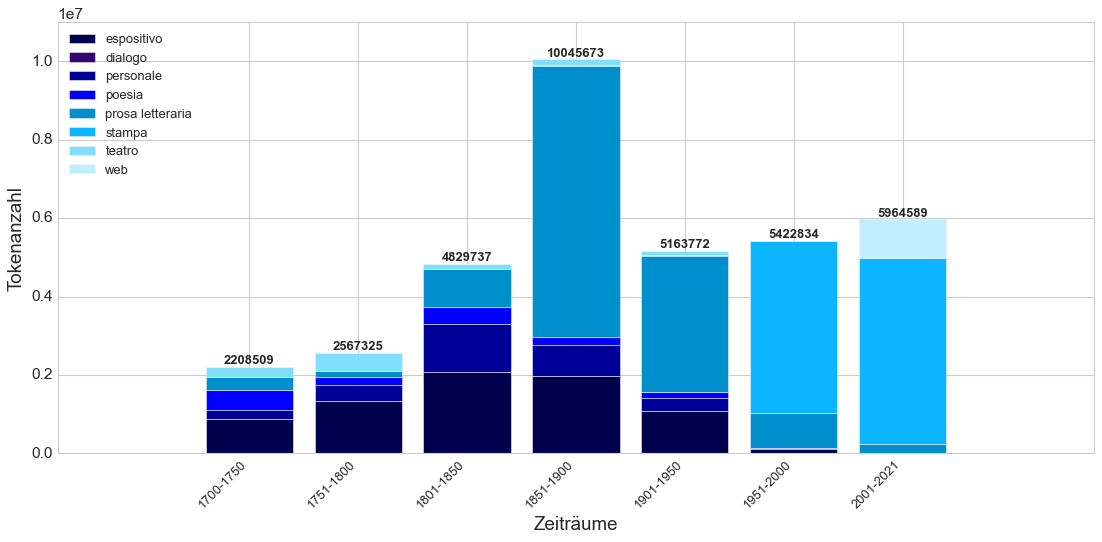

In [29]:
# Verteilung der Texttypen auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

data = np.array([espositivo, dialogo, personale, poesia, prosa_lett, stampa, teatro, web])
labels = ['espositivo', 'dialogo', 'personale', 'poesia', 'prosa letteraria', 'stampa', 'teatro', 'web']
colors = ['#00004d','#380474', '#000099', '#0000FF', '#008fcc', '#0BB5FF', '#80dfff', '#BFEFFF']

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
    plt.bar(X, data[i],bottom = np.sum(data[:i], axis=0),label=labels[i % len(labels)], color=colors[i % len(colors)])

x_indexes = np.arange(len(periods))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ylim(0,11000000)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusbig_tokenanzahl_texttypes.png')
plt.show()

### Lexikalische Vielfalt: Mean Segmental Type Token Ratio

In [30]:
df_periods = dict(tuple(df_bigger.groupby(by='period')))

In [31]:
df1 = df_periods['1700-1750']
df2 = df_periods['1751-1800']
df3 = df_periods['1801-1850']
df4 = df_periods['1851-1900']
df5 = df_periods['1901-1950']
df6 = df_periods['1951-2000']
df7 = df_periods['2001-2021']

In [32]:
dfs = [df1, df2, df3, df4, df5, df6, df7]

In [33]:
periods = ['1700-1750', '1751-1800', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '2001-2021']

In [34]:
msttrs = {}

for df, period in zip(dfs, periods):
    text = ''
    for i in df.text.astype(str):
        text += i
    filtered = re.sub('[^A-Za-z_àÀèÈìÌòÒùÙáÁéÉíÍóÓúÚ]',' ', text).lower() 
    lex = LexicalRichness(filtered)
    msttr = lex.msttr(segment_window=1000)               # TTR für Segmente mit 1000 Wörtern berechnen und Durchschnitt nehmen
    msttrs.update({period : msttr})

In [35]:
msttrs

{'1700-1750': 0.5178290676416812,
 '1751-1800': 0.4982953204876123,
 '1801-1850': 0.5164261315115299,
 '1851-1900': 0.5170844943369749,
 '1901-1950': 0.5140089546427867,
 '1951-2000': 0.5526702107815723,
 '2001-2021': 0.5717553758816452}

In [36]:
msttr_values = []

for i in msttrs.values():
    v = round(i, 3)
    msttr_values.append(v)

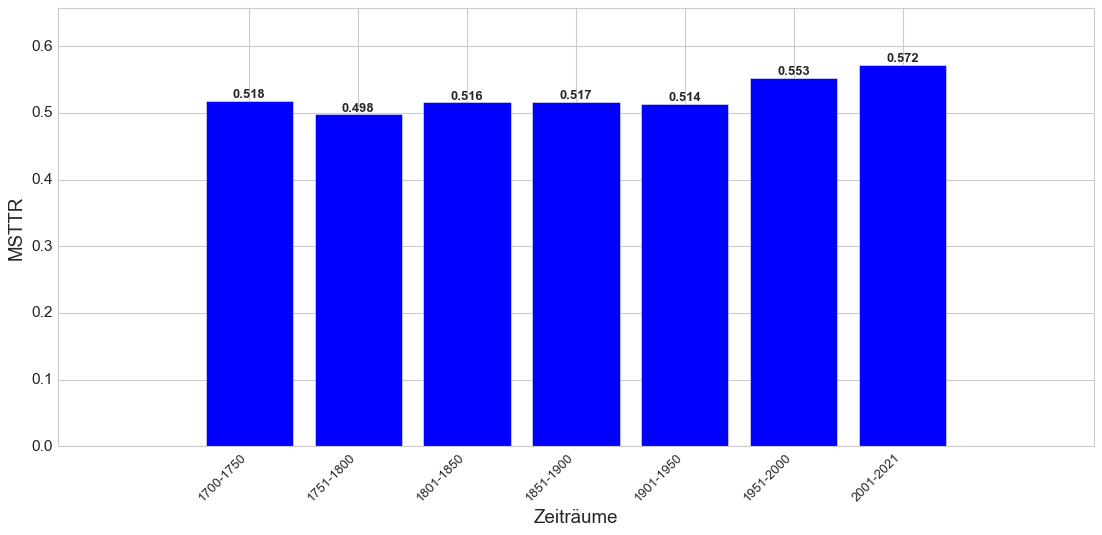

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

labels = periods
x_indexes = np.arange(len(periods))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('MSTTR')
plt.bar(x_indexes, msttr_values, label='MSTTR', width=0.8, color='b')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, msttr_values):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusbig_msttrs.png')

plt.show()